In [1]:
from glob import glob
import IPython.display as ipd
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
files = glob('../Downloads/Raw/Video/Segmented/*')

In [3]:
len(files)

2199

In [4]:
ipd.Audio(files[0])

In [5]:
y,sr = librosa.load(files[0])

/Users/aneeshbajwa/opt/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


<AxesSubplot:>

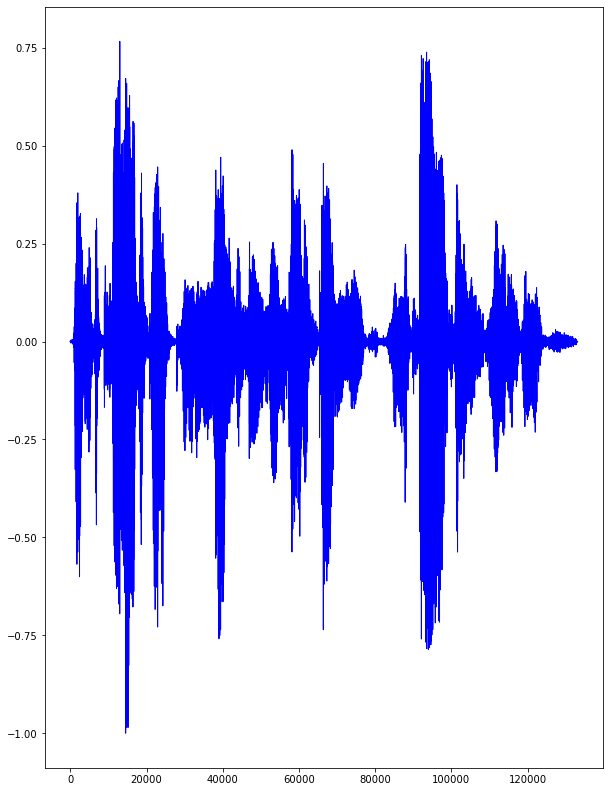

In [6]:
pd.Series(y).plot(figsize=(10,14), lw=1, color = 'blue')

In [7]:
trimmed_audio,_ = librosa.effects.trim(y)
trimmed_audio

array([ 7.5006537e-04, -2.6904681e-04,  9.4942184e-04, ...,
       -6.9990667e-05, -4.9964827e-05, -9.7606047e-05], dtype=float32)

<AxesSubplot:>

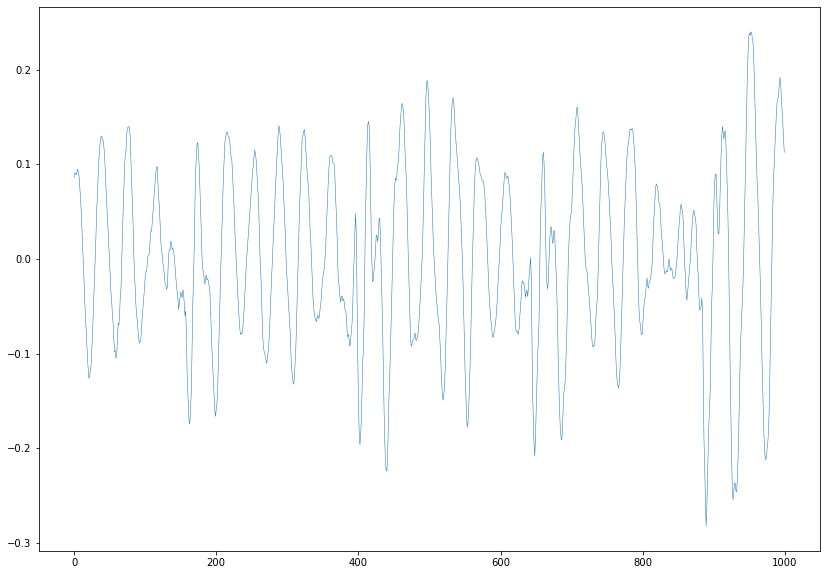

In [8]:
pd.Series(trimmed_audio[4000:5000]).plot(figsize=(14,10),lw=0.5)

In [9]:
D = librosa.stft(y)

In [10]:
S_db = librosa.amplitude_to_db(np.abs(D), ref = 1)

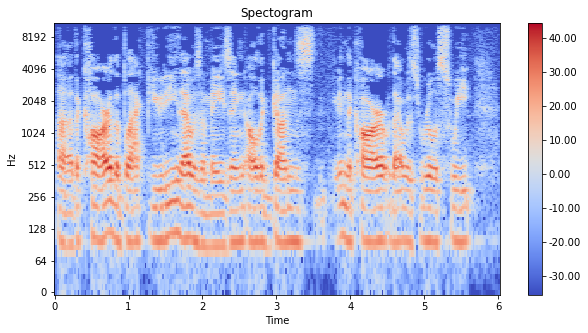

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,x_axis = 'time', y_axis = 'log', ax=ax)
ax.set_title('Spectogram')
fig.colorbar(img,ax=ax,format = f'%0.2f')
plt.show()

In [12]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 )

In [13]:
S_db_mel = librosa.amplitude_to_db(np.abs(S),ref = 1)

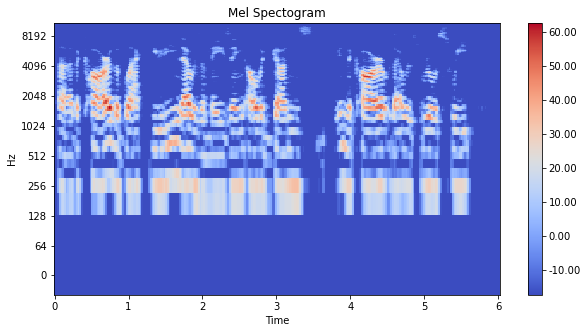

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel,x_axis = 'time', y_axis = 'log', ax=ax)
ax.set_title('Mel Spectogram')
fig.colorbar(img,ax=ax,format = f'%0.2f')
plt.show()